In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from IPython.display import clear_output

In [2]:
boston = datasets.load_boston()

In [3]:
X = boston.data
Y = boston.target

In [4]:
X_ = np.append(X,np.ones(X.shape[0]).reshape(-1,1),axis=1)

In [5]:
def cost(X_train,m,Y_train):
    cost_ = 0
    N = X_train.shape[0]
    for i in range(N):
        cost_ += (1/N)*((Y_train[i]-((X_train[i]*m).sum()))**2)
    return cost_

In [6]:
def step_gradient(X_train,Y_train,m,lr):
    
    slope_m = np.zeros(X_train.shape[1])
    N = X_train.shape[0]
    
    for i in range(N):
        slope_m += (2/N)*(Y_train[i]-(m*X_train[i]).sum())*(-X_train[i])
        
    m = m - (lr * slope_m)
    
    return m

In [54]:
def fit(X_train,Y_train,lr=0.001,epochs=100,verbose=False):
    m = np.zeros(X_train.shape[1])
    last_m = m
    cost_array = []
    unit = epochs//100
    for i in range(epochs+1):
        last_m = m
        m = step_gradient(X_train,Y_train,m,lr)
        cost_ = cost(X_train,m,Y_train)
        if verbose and i%unit==0:
            print("epoch:",i,"cost:",cost_)
            cost_array.append(cost_)
    
    cont = input()
        
    while cont=="y":
        clear_output(wait=True)
        epochs = int(input())
        lr_factor = float(input())
        lr*=lr_factor
        unit = epochs/10
        for i in range(epochs+1):
            last_m = m
            m = step_gradient(X_train,Y_train,m,lr)
            cost_ = cost(X_train,m,Y_train)
            if verbose and i%unit==0:
                print("epoch:",i,"cost:",cost_)
                cost_array.append(cost_)
        cont = input()
        
    return m,cost_array

In [55]:
def predict(X_test,m):
    y_pred = []
    for i in range(X_test.shape[0]):
        y_pred.append((X_test[i]*m).sum())
    return np.array(y_pred)

In [56]:
def score(Y_true,Y_pred):
    u = ((Y_true-Y_pred)**2).sum()
    v = ((Y_true-(Y_true.mean()))**2).sum()
    return 1-(u/v)

In [59]:
m, cost_array = fit(X_,Y,epochs=10000,lr=0.000003,verbose=True)
print(m)

50000
1
epoch: 0 cost: 27.368811781419716
epoch: 5000 cost: 27.256700548627872
epoch: 10000 cost: 27.148838829833057
epoch: 15000 cost: 27.045063588579062
epoch: 20000 cost: 26.945218066958827
epoch: 25000 cost: 26.849151542542344
epoch: 30000 cost: 26.75671909480186
epoch: 35000 cost: 26.667781380658095
epoch: 40000 cost: 26.582204418785256
epoch: 45000 cost: 26.499859382328303
epoch: 50000 cost: 26.420622399699305
n
[-0.09179655  0.06980289 -0.00515364  0.43836539  0.17505753  4.17845055
  0.02847668 -0.67952446  0.16875568 -0.0096674  -0.0633603   0.01831113
 -0.57006993  0.41935168]


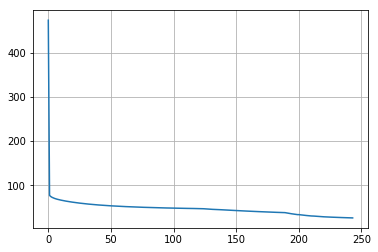

In [60]:
plt.plot(cost_array)
plt.grid()
plt.show()

In [61]:
y_pred = predict(X_,m)
y_pred.shape

(506,)

In [62]:
score(Y,y_pred)

0.6870319674409979

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
alg = LinearRegression()

In [30]:
alg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
alg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [32]:
alg.intercept_

36.459488385089855

In [23]:
alg.score(X,Y)

0.7406426641094095